# Importation des librairies

In [1]:
import matplotlib
import matplotlib.pyplot as plt # pour tracer les figures
import os # pour modifier le dossier de travail
import numpy as np 
from pathlib import Path # Pour rendre les Path compatibles entre Mac et Windows
from matplotlib import rc #Les trois prochaines lignes pour que Ã§a ressemble Ã  latex
rc('font', size=16)
rc('text', usetex=True)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'mathtext.default':  'regular' })
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Vitesse de solidification de la banquise
## Fresh water

$z_g(t)=\dfrac{\lambda_g}{h} \left(\sqrt{1+t/\tau}-1\right)$,  with   $\tau=\dfrac{\lambda_g^2}{2\Delta h^2}$ and   $\Delta=-\dfrac{\lambda_g T_2}{\rho_g L}$

### Variables

In [2]:
conduc=2.2
h=100
Temp=-40
rho=917
L=334
delta=-conduc*Temp/rho*L
tau=conduc**2/(2*delta*h**2)
D=-conduc*Temp/(L*rho)

In [3]:
print(D)

0.0002873206694571598


### Fonction

In [4]:
def z_g(t):
    return(((1+t/tau)**(1/2)-1))

Attention : j'ai viré le coeff devant

In [5]:
T=np.linspace(0,119,120)
Z=z_g(T)

### Tracé

In [6]:
def plot (X,Y,title,xlabel,ylabel):
    "Fonctio de tracé simple"
    #plot   
    fig,ax=plt.subplots(num=title, figsize=figsize)
    im=plt.plot(X,Y)
    
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    fig.suptitle(title,fontsize=20)
    plt.show()

<IPython.core.display.Javascript object>


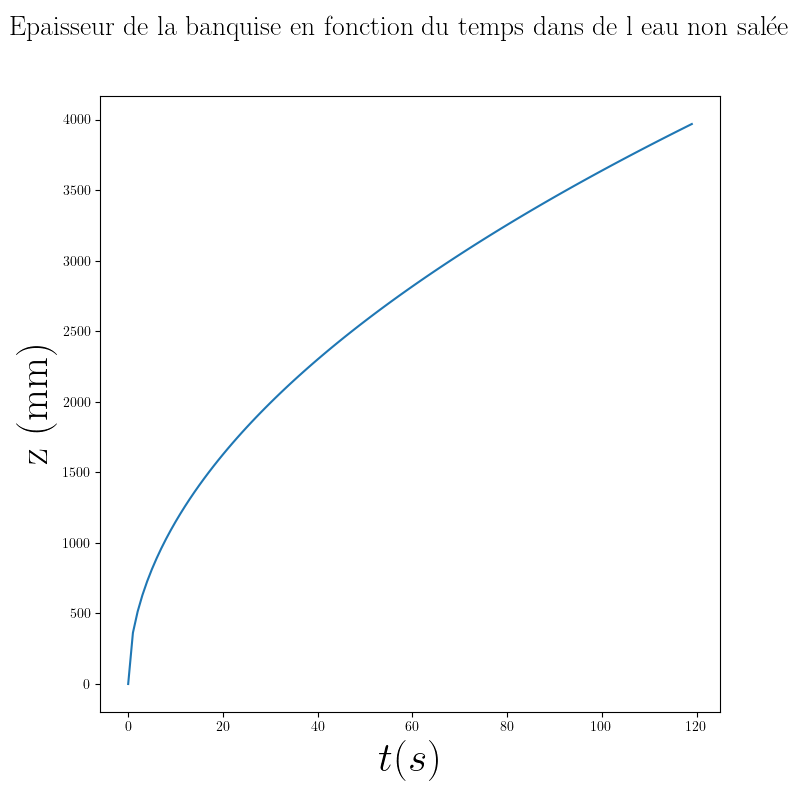

In [12]:
%matplotlib notebook
figsize=(8,8)
fontsize=30
plot(T,Z,'Epaisseur de la banquise en fonction du temps dans de l eau non salée',r"$t (s)$",r"z (mm)")

# Croissance horizontale des parois

$t=\dfrac{r_1^2}{2D}\left(\ln(\dfrac{r_0}{r_1})+\dfrac{\lambda_g}{hr_0}+\dfrac{1}{2}\right)-\dfrac{r_0^2}{2}\left(\dfrac{\lambda_g}{hr_0}+\dfrac{1}{2}\right)$  

avec $D=-\dfrac{\lambda T_s}{L\rho_g}$

## Données

In [8]:
T_s=-15
rho_g=917
D=-T_s*conduc/(L*rho_g)
r0=1e-3

## Fonction

In [9]:
def t(r):
    return(r**2/(2*D)*(np.log(r0/r)+conduc/(h*r0)+0.5)-r0**2/2*(conduc/(h*r0)+0.5))

In [10]:
R=np.linspace(r0,10*r0,200)
T2=t(R)

## Tracé

<IPython.core.display.Javascript object>


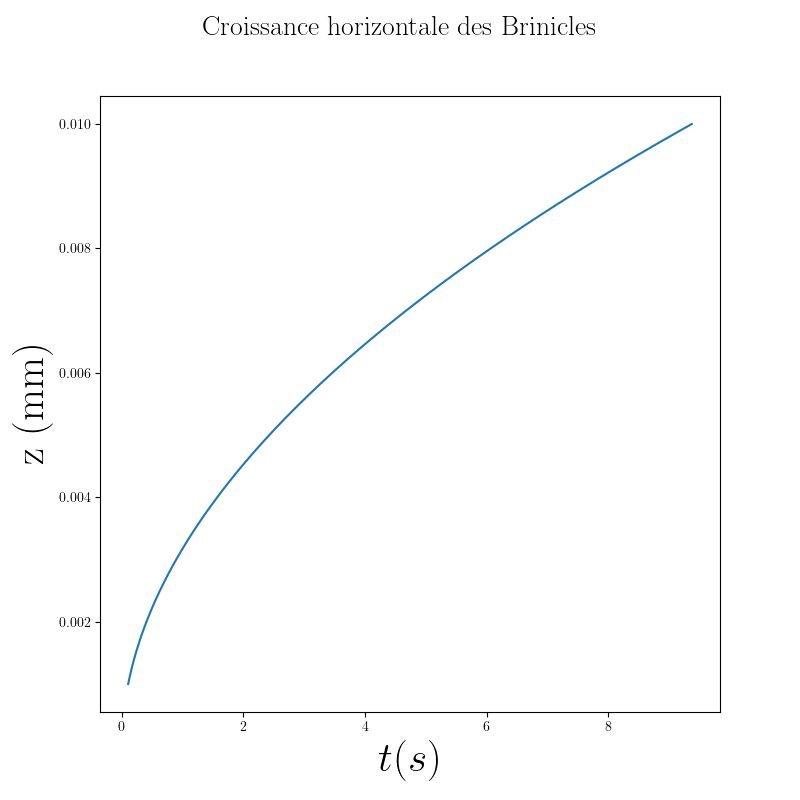

In [11]:
%matplotlib notebook
figsize=(8,8)
fontsize=30
plot(T2,R,'Croissance horizontale des Brinicles',r"$t (s)$",r"z (mm)")